![my picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)

- apple width ≈ 7 cm
- apple length ≈ 7 cm
- banana width ≈ 5 cm
- banana length ≈ 18 cm
- watermelon width ≈ 25 cm
- watermelon length ≈ 40 cm

apple: 0

banana: 1

watermelon: 2

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
n = 100
apple_width = np.random.normal(7, 1, n)
apple_length = np.random.normal(7, 1, n)
banana_width = np.random.normal(5, 1, n)
banana_length = np.random.normal(17, 2, n)
watermelon_width = np.random.normal(25, 5, n)
watermelon_length = np.random.normal(40, 5, n)

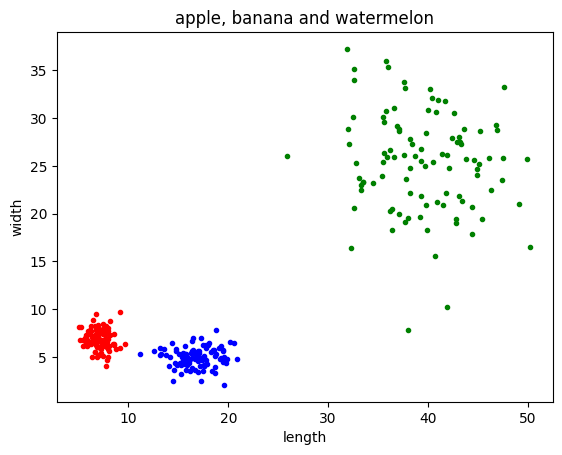

In [90]:
plt.scatter(apple_length, apple_width, c='red', marker='.')
plt.scatter(banana_length, banana_width, c='blue', marker='.')
plt.scatter(watermelon_length, watermelon_width, c='green', marker='.')
plt.title('apple, banana and watermelon')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [91]:
# kNN: k-Nearest Neighbors

In [92]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
length = np.concatenate((apple_length, banana_length, watermelon_length))

X_train = np.array([length, width]).T
X_train

array([[ 7.46594206,  5.11828551],
       [ 5.14889125,  6.79058794],
       [ 7.40821326,  8.45930711],
       [ 7.97404496,  5.82853379],
       [ 7.24126588,  7.7924846 ],
       [ 6.80059239,  7.04063661],
       [ 6.88347622,  5.99504792],
       [ 5.2679961 ,  8.11098201],
       [ 6.63326266,  8.25437733],
       [ 6.72859183,  6.54337722],
       [ 6.42862742,  6.90516573],
       [ 7.96274432,  6.87890288],
       [ 6.49400227,  7.19189444],
       [ 7.47398903,  7.36953488],
       [ 5.40858634,  6.75989744],
       [ 7.72663803,  8.24897907],
       [ 8.59715804,  6.20662242],
       [ 7.8168468 ,  6.52754322],
       [ 9.11337647,  9.68007925],
       [ 7.18493939,  7.73988088],
       [ 8.19965809,  7.29274236],
       [ 6.48216836,  6.99761487],
       [ 7.25480751,  5.37934248],
       [ 6.7464673 ,  8.16456728],
       [ 6.76195724,  6.21405348],
       [ 7.63933539,  6.78093205],
       [ 5.65197915,  6.97851831],
       [ 5.71774166,  7.08349583],
       [ 6.96659943,

In [93]:
Y_apples = np.zeros(n, dtype=int) 
# Y_apples

In [94]:
Y_bananas = np.ones(n, dtype=int) 
# Y_bananas

In [95]:
Y_watermelons = np.ones(n, dtype=int) * 2
# Y_watermelons

In [96]:
Y_train = np.concatenate((Y_apples, Y_bananas, Y_watermelons))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [98]:
# Example for def euclidean_distance(x1, x2):
point1 = np.array([4, 5])
point2 = np.array([10, 2])

euclidean_distance(point1, point2)

6.708203932499369

In [99]:
new_fruit = np.array([25, 20])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)

# distances

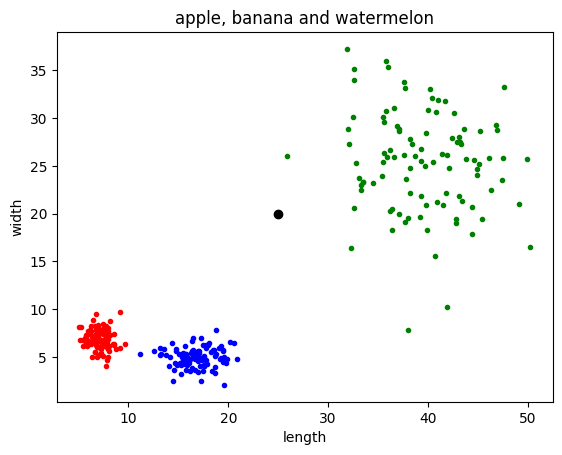

In [100]:
plt.scatter(apple_length, apple_width, c='red', marker='.')
plt.scatter(banana_length, banana_width, c='blue', marker='.')
plt.scatter(watermelon_length, watermelon_width, c='green', marker='.')
plt.scatter(new_fruit[0], new_fruit[1], c='black', marker='o')
plt.title('apple, banana and watermelon')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [101]:
k = 5

In [102]:
np.sort(distances)

array([ 6.04629156,  7.60055526,  8.12751491,  8.62158725,  8.83762438,
        8.9272143 ,  9.09462897,  9.14173643,  9.38545946,  9.98850537,
       10.20068207, 11.09253941, 11.19742424, 11.22553663, 11.40372609,
       11.47919965, 11.79792687, 12.09877669, 12.37520489, 12.3866259 ,
       12.58893996, 12.74330441, 12.99714092, 13.03869641, 13.04040979,
       13.26834641, 13.39574436, 13.72459801, 13.9793592 , 14.05245171,
       14.17236963, 14.27180822, 14.28546347, 14.32072673, 14.45908899,
       14.60152314, 14.84797416, 14.86532096, 14.91375878, 14.96012406,
       14.99256009, 14.99589418, 15.00551463, 15.16702497, 15.22307817,
       15.2262173 , 15.24908391, 15.30099289, 15.31469556, 15.31756946,
       15.35663669, 15.37870431, 15.42942592, 15.51730699, 15.54934346,
       15.56432243, 15.63232678, 15.68092889, 15.70329585, 15.7991619 ,
       15.79957886, 15.83457127, 15.87333632, 15.89185297, 15.92395908,
       15.92812163, 15.9573704 , 15.97409721, 16.02550949, 16.05

In [103]:
np.argsort(distances)

array([286, 271, 230, 266, 284, 262, 290, 293, 210, 213, 270, 299, 285,
       223, 268, 273, 234, 200, 267, 296, 221, 209, 224, 220, 251, 289,
       240, 158, 280, 261, 203, 102, 279, 153, 250, 215, 282, 207, 231,
       214, 131, 248, 258, 149, 205, 137, 264, 260, 189, 109, 292, 112,
       139, 212, 148, 194, 177, 141, 113, 164, 175, 297, 100, 265, 288,
       118, 163, 178, 256, 132, 183, 197, 154, 128, 244, 204, 199, 168,
       120, 105, 278, 152, 196, 160, 117, 106, 159, 198, 191, 122, 202,
       201, 171, 151, 136, 123, 229, 145, 193, 184, 142, 103, 150, 192,
       157, 173, 188, 135, 172, 155, 252, 124, 121, 156, 138, 114, 101,
       110, 143, 134, 185, 119, 186, 236, 277, 165, 127, 206, 225, 169,
       208, 176, 108, 187, 272, 107, 287, 182, 161, 166, 126, 104, 242,
       115, 195, 144, 241, 181, 111, 130, 218, 133, 263, 167, 162, 129,
       180, 116, 233,  18, 140, 174, 227, 245, 125, 219, 146, 276, 147,
       274, 190, 228, 291, 281, 238, 235, 253, 247, 222, 298, 17

In [104]:
nearest_neighbors = np.argsort(distances)[0:k]
nearest_neighbors

array([286, 271, 230, 266, 284], dtype=int64)

In [105]:
Y_train[nearest_neighbors]

array([2, 2, 2, 2, 2])

In [106]:
result = np.bincount(Y_train[nearest_neighbors])
result

array([0, 0, 5], dtype=int64)

In [107]:
if np.argmax(result) == 0:
    print('🍎')
elif np.argmax(result) == 1:
    print('🍌')
else:
    print('🍉')

🍉
